In [30]:
%matplotlib inline
import pickle 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mlp 

from tis.utils import data_loader

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.manifold import TSNE
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [6]:
print(mlp.__version__) 

3.4.0


In [7]:
# initialize the models that we need to train 
MODELS = [
    SVC(C=1.0, kernel='rbf', probability=True), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=50), 
    AdaBoostClassifier(n_estimators=50), 
    QuadraticDiscriminantAnalysis()
]
# names of the classifiers... must be in the same order 
NAMES = [
    'SVC', 
    'DTC', 
    'RFC', 
    'GBC', 
    'AdaBoost', 
    'QDA'
]
CV = 5 
PERFS = ['accuracy', 'f1_macro']

In [8]:
def get_means(scores:dict):
    """average out the results from 
    """
    for key in scores.keys(): 
        scores[key] = scores[key].mean()
    return scores 

def init_scores(keys):
    """set up the scores dictionary 
    """
    scores = {}
    for key in keys: 
        scores[key] = []
    return scores 

In [9]:
files_normal = ['comp2/normal_1.csv', 'comp2/normal_2.csv']
files_attack = ['comp2/attack_label.csv']
X, Y, keys = data_loader(files_normal=files_normal, files_attack=files_attack)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
scores = init_scores(NAMES)
for i in range(len(MODELS)): 
    print(''.join(['Running ', NAMES[i]]))
    clfr = MODELS[i]
    scores[NAMES[i]] = get_means(cross_validate(MODELS[i], X, Y, cv=CV, scoring=PERFS))
pickle.dump(scores, open('outputs/tis-supervised.pkl', 'wb'))

Running SVC
Running DTC
Running RFC
Running GBC
Running AdaBoost
Running QDA


C:\Users\grego\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\grego\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\grego\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\grego\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\grego\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [44]:
for i in range(len(MODELS)): 
    print(''.join(['Running ', NAMES[i]]))
    mdl = MODELS[i].fit(X_train, Y_train)
    y_predict = mdl.predict_proba(X_test)
    y_hat = mdl.predict(X_test)
    
    cm = confusion_matrix(Y_test, y_hat)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) # display_labels=keys
    disp.plot()
    plt.title(NAMES[i])
    plt.savefig(''.join(['outputs/cm_', NAMES[i], '.pdf']))
    plt.close()
    
    plt.figure()
    for j in range(y_predict.shape[1]): 
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predict[:,j], pos_label=j)
        plt.plot(fpr, tpr, label=keys[j])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(NAMES[i])
    plt.savefig(''.join(['outputs/roc_curves_', NAMES[i], '.pdf']))
    plt.close()

Running SVC
Running DTC
Running RFC
Running GBC
Running AdaBoost
Running QDA


C:\Users\grego\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
out = '\t'
for stat_name in scores[clfr_name]: 
    out += stat_name + ' \t '
print(out)

for clfr_name in scores.keys(): 
    out = clfr_name + ' \t '
    for stat_name in scores[clfr_name]: 
        out += str(scores[clfr_name][stat_name]) + '\t'
    print(out)

	fit_time 	 score_time 	 test_accuracy 	 test_f1_macro 	 
SVC 	 17.902752590179443	1.124335241317749	0.8352483523970495	0.1311587352264181	
DTC 	 0.17156982421875	0.006796121597290039	0.9943360454908742	0.9687240681723239	
RFC 	 1.5237862110137939	0.07985835075378418	0.9975725534897737	0.9855372325769224	
GBC 	 112.27622985839844	0.03837766647338867	0.9962779240857932	0.9789410102791525	
AdaBoost 	 4.787078762054444	0.14251017570495605	0.858391441636204	0.15863439078466698	
QDA 	 0.2017005443572998	0.0798421859741211	0.9865668278238537	0.9156405108270554	


In [21]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_train)

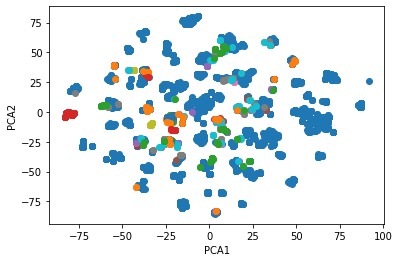

In [27]:
plt.figure()
for i in np.unique(Y_train): 
    plt.scatter(X_embedded[Y_train==i, 0], X_embedded[Y_train==i, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('outputs/tnse_plots.pdf')

<Figure size 576x432 with 0 Axes>

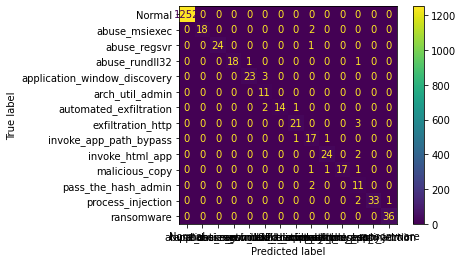

In [41]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=keys)
disp.plot()

In [42]:
for i in range(len(keys)): 
    print(str(i) + ': ' + keys[i])

0: Normal
1: abuse_msiexec
2: abuse_regsvr
3: abuse_rundll32
4: application_window_discovery
5: arch_util_admin
6: automated_exfiltration
7: exfiltration_http
8: invoke_app_path_bypass
9: invoke_html_app
10: malicious_copy
11: pass_the_hash_admin
12: process_injection
13: ransomware
